In [1]:
import numpy as np
from scipy.sparse import csr_matrix
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def similarity_limit(B,A,iterations=100):
    Z_old=np.full((B.shape[0],A.shape[0]),1)
    for i in range(iterations):
        Z=B@Z_old@A.T+B.T@Z_old@A
        Z=Z/np.sqrt((Z**2).sum())
        Z_old=Z
    return Z   

In [3]:
row = np.array([0,1,1,2,2,3,3,3,3,3,4,4,4,8])
col = np.array([3,3,4,3,4,4,5,6,7,8,3,6,7,4])
data = np.full(14,1)
B=csr_matrix((data,(row,col)),shape=(9, 9))

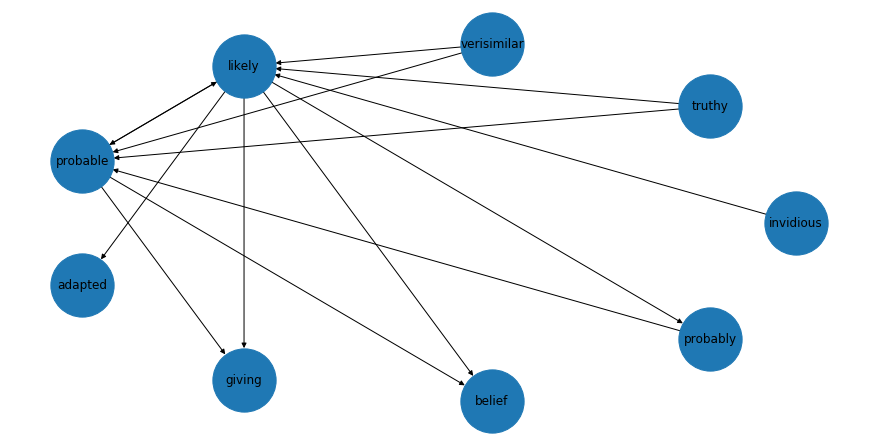

In [4]:
g=nx.from_numpy_matrix(B.toarray(),create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,6))
labels={0:'invidious',1:'truthy',2:'verisimilar',
        3:'likely',4:'probable',5:'adapted',
        6:'giving',7:'belief',8:'probably'}
nx.draw(g,pos=nx.circular_layout(g),labels=labels,node_size=4000)

In [5]:
df=pd.DataFrame(similarity_limit(B,np.diag([1,1],1))[:,1])

In [6]:
df.rename(index=labels,columns={0:'central score'},inplace=True)
df.sort_values(by=['central score'],ascending=False)

,central score
likely,0.399448
probable,0.331992
probably,0.100011
giving,0.092729
belief,0.092729
truthy,0.091873
verisimilar,0.091873
adapted,0.049400
invidious,0.041262
